### Ejercicio 3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [3]:
lineal_horm = pd.read_excel('lineal_horm.xlsx')

In [15]:
display(lineal_horm.head())

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6


In [4]:
X = lineal_horm[["horas"]]
Y = lineal_horm[["monto"]]
regresion = linear_model.LinearRegression()
reg = regresion.fit(X, Y)

In [5]:
#Intercepto
beta_0 = regresion.intercept_

#Coef
beta_1 = regresion.coef_

In [6]:
#Y_estimada
Y_pred = regresion.predict(X).reshape(-1)


In [7]:
X = X.to_numpy().reshape(-1)
Y_real= Y.to_numpy()
Y_real= Y_real.reshape(-1)

In [8]:
residual = Y_real - Y_pred

In [9]:
#Errores 

n = len(Y_real)
den = sum((X-np.mean(X))**2)
num=sum(residual**2)/(n-2)
error=np.sqrt(num/den)


In [37]:
def horm_bootstrap(n):
    regresion = linear_model.LinearRegression()
    coef_boost = np.array([ ])
    inter_boost = np.array([ ])
    error_boost = np.array([ ])
    
    for i in range(0,n):
        #Se toma una muestra de tamaño 15 
        muestra_aux = lineal_horm.groupby('lote').apply(lambda x: x.sample(5)).reset_index(drop=True)
        
        #Se hace un remuestreo con la muestra obtenida (muestra_aux)
        random = np.random.choice(muestra_aux['horas'], len(muestra_aux['horas']), replace = True)
        
        df_aux =  pd.DataFrame(random, columns=['horas'])
        muestra = pd.merge(df_aux, lineal_horm, how="inner", on=["horas"])

        X_1 = muestra[["horas"]]
        Y_1 = muestra[["monto"]]
        reg = regresion.fit(X_1, Y_1)
        Y_pred = regresion.predict(X_1).reshape(-1)

        Y_real= Y_1.to_numpy().reshape(-1)
        X_1 = X_1.to_numpy().reshape(-1)

        df_aux1 = pd.DataFrame(X_1, columns=['horas'])
        df_aux1 = pd.merge(df_aux1, lineal_horm, how="inner", on=["horas"])

        #Estimacion
        residuales = Y_real - Y_pred

        #error estandar
        x_j=df_aux1[["horas"]].to_numpy().reshape(-1)
        den=sum((x_j-np.mean(x_j))**2)
        num= sum(residuales**2)/(n)
        
        err=np.sqrt(num/den)
        error_boost = np.append(error_boost, err)
    
        #Coefiencientes 
        intercepto = regresion.intercept_
        coef = regresion.coef_
        coef_boost = np.append(coef_boost,coef)
        inter_boost = np.append(inter_boost, intercepto)

    df_inter = pd.DataFrame(inter_boost, columns=['Beta_0'])
    df_coef = pd.DataFrame(coef_boost, columns=['Beta_1'])
    df_error = pd.DataFrame(error_boost, columns = ['Errores'])
    df = pd.concat([df_inter, df_coef, df_error], axis = 1)
        
        
    
    return(df)

In [ ]:
df = horm_bootstrap(1000)

Text(0.5, 1.0, 'Histograma de los errores')

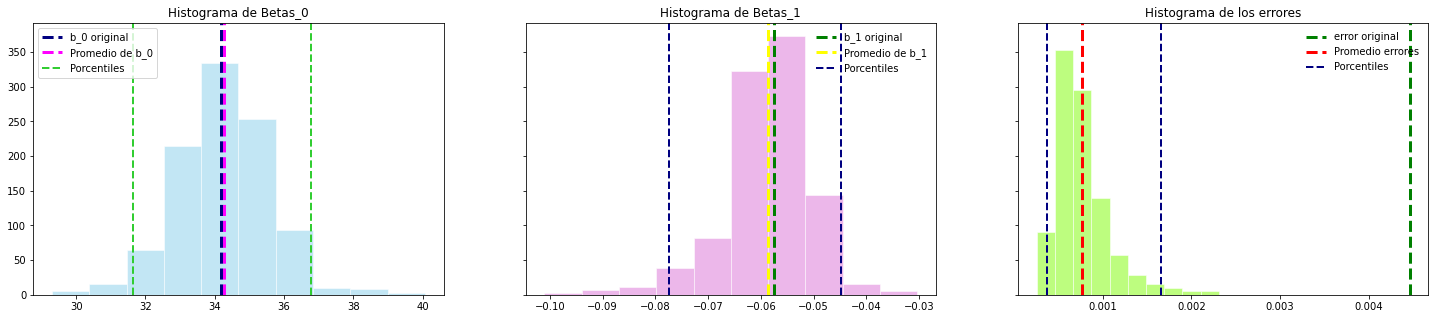

In [43]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25,5))
#Beta_0
ax1.hist(df['Beta_0'],alpha=0.5,color = "skyblue",edgecolor="white")
ax1.axvline(x = beta_0,color='navy', linestyle='--',linewidth=3)
ax1.axvline(x = np.mean(df['Beta_0']),color='magenta', linestyle='--',linewidth=3)
ax1.axvline(np.percentile(df['Beta_0'],2.5),color="limegreen",linestyle="--",linewidth=2)                                                                                                                                                    
ax1.axvline(np.percentile(df['Beta_0'],97.5),color="limegreen",linestyle="--",linewidth=2) 
ax1.legend(['b_0 original','Promedio de b_0','Porcentiles'], loc = 'upper left')
ax1.set_title("Histograma de Betas_0")

#Beta_1
ax2.hist(df['Beta_1'],alpha=0.5,color = "orchid",edgecolor="white")
ax2.axvline(x=beta_1,color='green', linestyle='--',linewidth=3)
ax2.axvline(x = np.mean(df['Beta_1']),color='yellow', linestyle='--',linewidth=3)
ax2.axvline(np.percentile(df['Beta_1'],2.5),color="navy",linestyle="--",linewidth=2)                                                                                                                                                    
ax2.axvline(np.percentile(df['Beta_1'],97.5),color="navy",linestyle="--",linewidth=2)
ax2.legend(['b_1 original','Promedio de b_1','Porcentiles'], frameon=False, loc=1)
ax2.set_title("Histograma de Betas_1")

#Errores
ax3.hist(df['Errores'],bins=10, alpha=0.5,color = "lawngreen",edgecolor="white")
ax3.axvline(x= error ,color='green', linestyle='--',linewidth=3)
ax3.axvline(x = np.mean(df['Errores']),color='red', linestyle='--',linewidth=3)
ax3.axvline(np.percentile(df['Errores'],2.5),color="navy",linestyle="--",linewidth=2)                                                                                                                                                    
ax3.axvline(np.percentile(df['Errores'],97.5),color="navy",linestyle="--",linewidth=2) 
ax3.legend(['error original','Promedio errores','Porcentiles'], frameon=False, loc=1)
ax3.set_title("Histograma de los errores")


In [45]:
df.describe()

,Beta_0,Beta_1,Errores
count,1000.000000,1000.000000,1000.000000
mean,34.302696,-0.059103,0.000762
std,1.325963,0.008259,0.000304
min,25.882393,-0.106473,0.000224
25%,33.524986,-0.062978,0.000559
50%,34.296908,-0.058230,0.000702
75%,35.096983,-0.054391,0.000883
max,40.379446,-0.008163,0.002648


In [51]:
print("Error Estándar sin Bootsrap:", error)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(df['Errores']))
print('Rango = ',  "(", np.percentile(df['Errores'],2.5),",",np.percentile(df['Errores'],97.5),")")

Error Estándar sin Bootsrap: 0.0044641731603115384
Promedio de Error Estándar de la muestras Bootstrap: 0.0007623974748269982
Rango =  ( 0.0003583019445372578 , 0.001572225856215489 )


In [50]:
print("Intercepto sin Bootsrap:", beta_0)
print("Promedio de las betas con Bootstrap:", np.mean(df['Beta_0']))
print('Rango = ',  "(", np.percentile(df['Beta_0'],2.5),",",np.percentile(df['Beta_0'],97.5),")")

Intercepto sin Bootsrap: [34.16752817]
Promedio de las betas con Bootstrap: 34.30269623949293
Rango =  ( 31.767789229047764 , 36.91540093399993 )


In [52]:
print("Coeficiente sin Bootsrap:", beta_1)
print("Promedio de las betas con Bootstrap:", np.mean(df['Beta_1']))
print('Rango = ',  "(", np.percentile(df['Beta_1'],2.5),",",np.percentile(df['Beta_1'],97.5),")")

Coeficiente sin Bootsrap: [[-0.0574463]]
Promedio de las betas con Bootstrap: -0.059102791102238046
Rango =  ( -0.07864212490327321 , -0.045386199756852194 )


#### Notemos: 
* El error estándar disminuyo con la muestras bootstrap en comparación con el error estándar (sin bootstrap) del dataset  

* El intercepto y el coeficiente con o sin bootstrap son muy similares. 